In [1]:
#Description: This program gets BTC's daily simple return

In [2]:
# Install dependencies
! pip install -U pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [4]:
#Load the data

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

df = web.DataReader(
    'BTC-USD',
    'yahoo',
    start,
    end
)

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600,431.959991
...,...,...,...,...,...,...
2022-06-19,20683.822266,18067.152344,19010.902344,20553.271484,35329942625,20553.271484
2022-06-20,20913.322266,19689.169922,20553.371094,20599.537109,30818458597,20599.537109
2022-06-21,21620.628906,20415.062500,20594.294922,20710.597656,28970212744,20710.597656


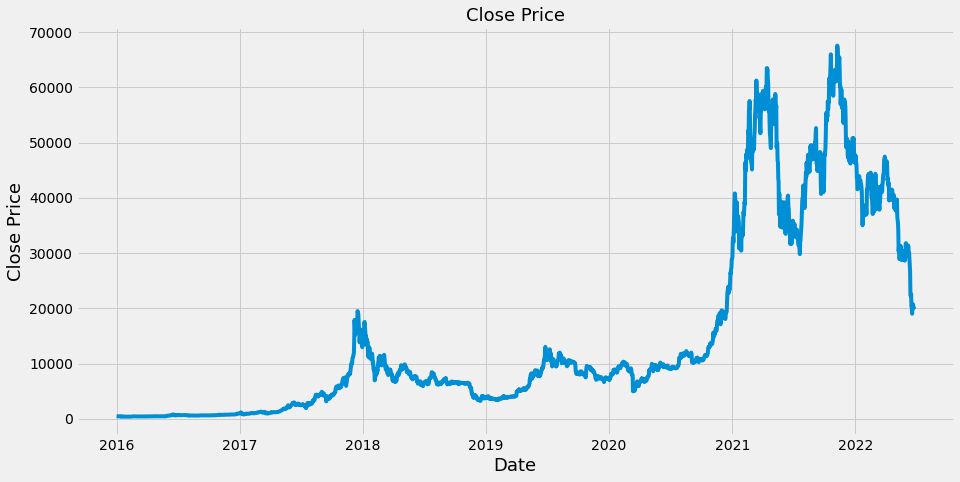

In [6]:
#Visually show and plot the close price
plt.figure(figsize=(14,7))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:
# Calculate and show the Daily Simple Return
DSR = df['Close'].pct_change()
DSR

Date
2016-01-01         NaN
2016-01-02   -0.002063
2016-01-03   -0.007907
2016-01-04    0.007163
2016-01-05   -0.002611
                ...   
2022-06-19    0.080748
2022-06-20    0.002251
2022-06-21    0.005391
2022-06-22   -0.034937
2022-06-23    0.015920
Name: Close, Length: 2366, dtype: float64

In [8]:
# Get some statistics on the DSR
DSR.describe()

count    2365.000000
mean        0.002415
std         0.039526
min        -0.371695
25%        -0.013780
50%         0.002082
75%         0.018269
max         0.252472
Name: Close, dtype: float64

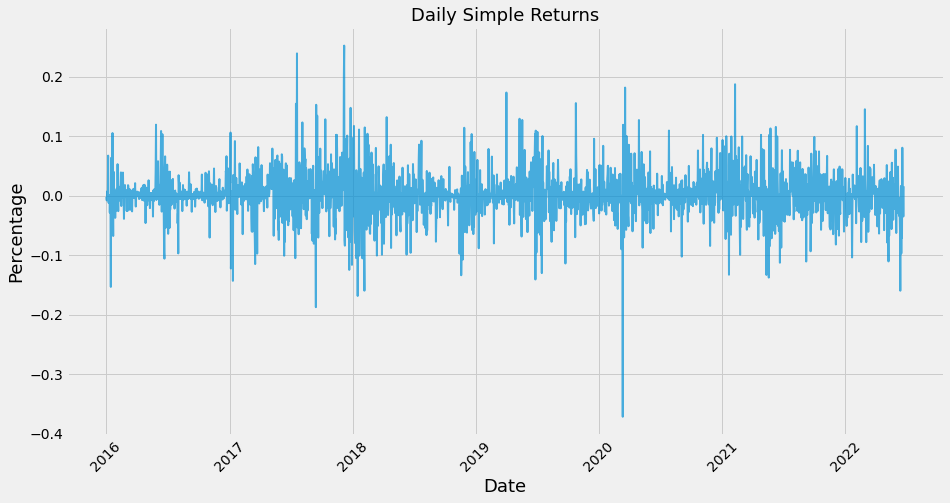

In [9]:
# Visually show and plot the DSR
plt.figure(figsize=(14,7))
plt.title('Daily Simple Returns', fontsize=18)
plt.plot(DSR.index, DSR, label='DSR', lw=2, alpha=0.7)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(rotation=45)
plt.show()

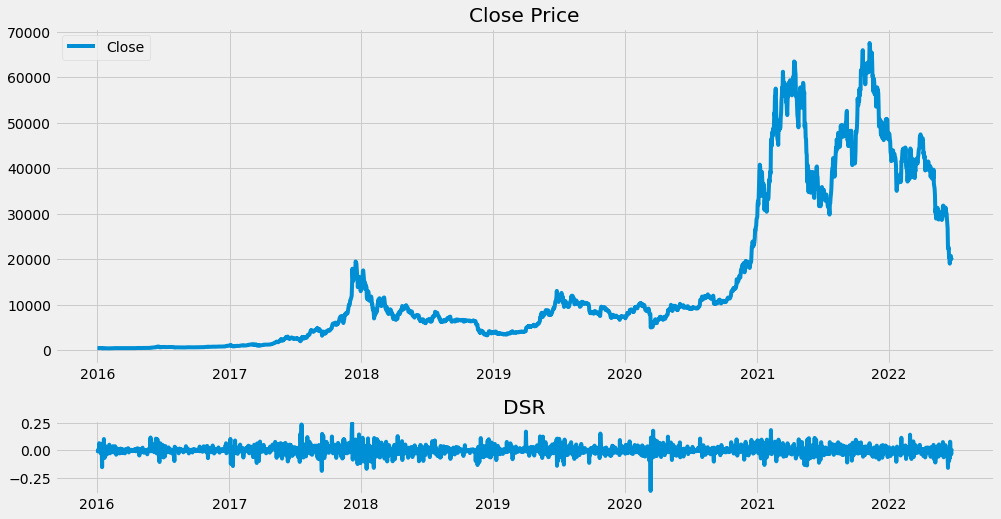

In [10]:
# Put the teo chars together
#First plot the close price
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(df.index, df['Close'], label='Close')
plt.title('Close Price')
plt.legend(loc='upper left')
# Plot the DSR
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
plt.title('DSR')
bottom.plot(DSR.index, DSR)
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)